In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.naive_bayes import BernoulliNB

In [3]:
#Using the amazon set
df = pd.read_csv("amazon_cells_labelled.txt", delimiter = '\t', header = None)
df.columns = ['review', 'sentiment']
#For sentiment column 1 is positive, 0 is negative
df.head()


,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
df['sentiment'].sum()
#Counting the number of positive reviews, appears to be a half and half
#split between positive and negative

500

In [5]:
df.describe()


,sentiment
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
df['review'].str.count('Bad').sum()

4

In [7]:
#Changing all text to lowercase.  I found 'bad' has 10 results, 'Bad' has 4
#df['review'] = df['review'].str.lower()
#df['review'].str.count('bad').sum() #This gets 14 which was the goal
#Just looked deeper into the for loop in the guided example, now I see why
#they added the spaces and what the case argument is for. I didn't need to 
#change the text to lowercase because of the case argument. 

In [8]:
keywords = ['bad', 'terrible', 'awful', 'garbage', 'useless', 'waste',
           'regret', 'refund', 'good', 'recommend', 'great', 'happy',
           'useful', 'fantastic']

for word in keywords:
    df[str(word)] = df['review'].str.contains(
    ' ' + str(word) + ' ', case = False)

df.head()

,review,sentiment,bad,terrible,awful,garbage,useless,waste,regret,refund,good,recommend,great,happy,useful,fantastic
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df['sentiment'] =df['sentiment'].astype('bool')
df.head()

,review,sentiment,bad,terrible,awful,garbage,useless,waste,regret,refund,good,recommend,great,happy,useful,fantastic
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


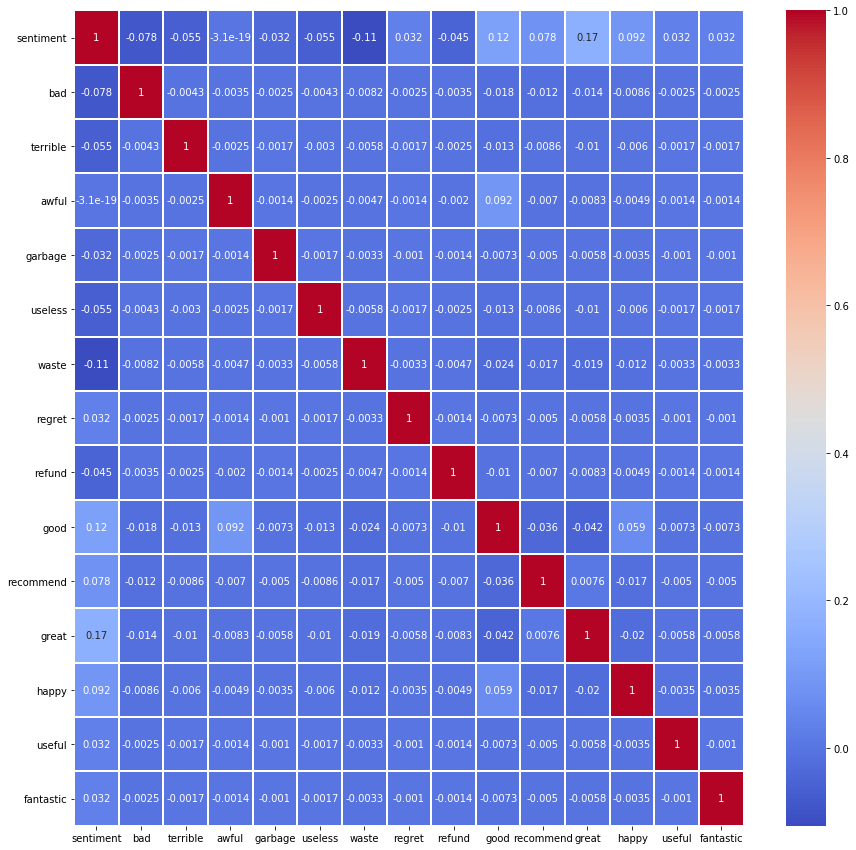

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, linewidth = 1, cmap = "coolwarm") #DOes not look great, a little on the lighter side
#for most of the heatmap

#Now that I annotated the thing I think I can work with this but I am not sure

In [11]:
data = df[keywords]
target = df['sentiment']
bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of misclassified points out of a total {} points : {}".format(
data.shape[0], (target != y_pred).sum()))
#I dont know why I have data.shape[0] or if I did it right but at least I have
#something slightly better then a coin flip. So that's good.  
#I am going to ask questions during mentorship for more of this. 

Number of misclassified points out of a total 1000 points : 421


In [12]:
yelp = pd.read_csv("yelp_labelled.txt", delimiter = "\t", header = None)
yelp.columns = ["review", "sentiment"]
yelp.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [14]:
yelp['sentiment'].sum() #Looks like another 50/50 split

500

In [15]:
yelp.describe()

,sentiment
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [16]:
yelp_keywords = ['bad', 'terrible', 'awful', 'garbage', 'useless', 'waste',
           'regret', 'refund', 'good', 'recommend', 'great', 'happy',
           'useful', 'fantastic']

for word in yelp_keywords:
    yelp[str(word)] = yelp['review'].str.contains(
    ' ' + str(word) + ' ', case = False)

yelp.head()

,review,sentiment,bad,terrible,awful,garbage,useless,waste,regret,refund,good,recommend,great,happy,useful,fantastic
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [18]:
yelp['sentiment'] = yelp['sentiment'].astype('bool')
yelp.head()

,review,sentiment,bad,terrible,awful,garbage,useless,waste,regret,refund,good,recommend,great,happy,useful,fantastic
0,Wow... Loved this place.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False


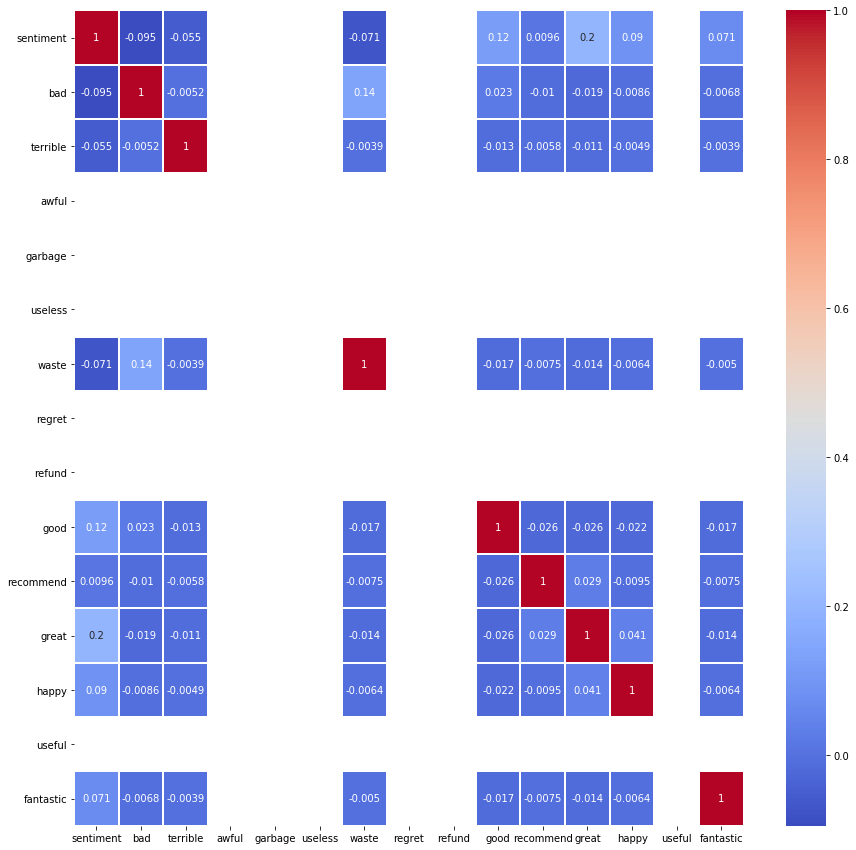

In [19]:
plt.figure(figsize = (15,15))
sns.heatmap(yelp.corr(), annot = True, linewidth = 1, cmap = "coolwarm") 
#OK turns out a lot of words that were in the Amazon reviews are not in this
#dataset of yelp reviews.

In [20]:
yelp['awful'].sum()

0

In [21]:
yelp_data = yelp[yelp_keywords]
yelp_target = yelp['sentiment']
yelp_bnb = BernoulliNB()

bnb.fit(data, target)

yelp_y_pred = bnb.predict(data)

print("Number of misclassified points out of a total {} points : {}".format(
data.shape[0], (target != yelp_y_pred).sum()))
#Same result as earlier. I have screwed something up

Number of misclassified points out of a total 1000 points : 421
